In [1]:
import torch

if torch.cuda.is_available():
    print("CUDA is available!")
    print(f"Device count: {torch.cuda.device_count()}")
    print(f"Device name: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available.")

CUDA is available!
Device count: 1
Device name: NVIDIA GeForce RTX 4060 Laptop GPU


In [21]:
from ultralytics import YOLO

In [36]:
#result = torch.load("/home/areebadnan/Areeb_code/work/Atheritia/ultralytics/yolov8n.pt")
result = YOLO("/home/areebadnan/Areeb_code/work/Atheritia/47_(10)_logos_head_17logosbase_L_3/train/weights/best.pt")
result.names
result.model.eval()
torch.save({'model': result.model}, "corrected_best.pt")

In [30]:
#result = YOLO("/home/areebadnan/Areeb_code/work/Atheritia/ultralytics/yolov8n.pt")
result = YOLO("/home/areebadnan/Areeb_code/work/Atheritia/47_(10)_logos_head_17logosbase_L_3/train/weights/best.pt")

In [32]:
result.names

{0: 'Joma',
 1: 'Stahlwerk',
 2: 'Tiktok',
 3: 'tipico',
 4: 'BetWay',
 5: 'SAP',
 6: 'Sparkasse',
 7: 'Volkswagen',
 8: 'Umbro',
 9: 'PENNY'}

In [31]:
result['model'].names

TypeError: 'YOLO' object is not subscriptable

In [23]:
from YOLOv8_Explainer import yolov8_heatmap, display_images

model = yolov8_heatmap(
    weight=result, 
    method="EigenGradCAM",
        
)



imagelist = model(
    img_path="/home/areebadnan/Areeb_code/work/Atheritia/Scripts/Explainable_AI_YOLOv8/Explainable_AI_YOLOv8/test_images_for_Explainable_AI/62d5e5fe43918a4b049afa52_505.jpg", 
    )


AttributeError: 'YOLO' object has no attribute 'seek'. You can only torch.load from a file that is seekable. Please pre-load the data into a buffer like io.BytesIO and try to load from it instead.

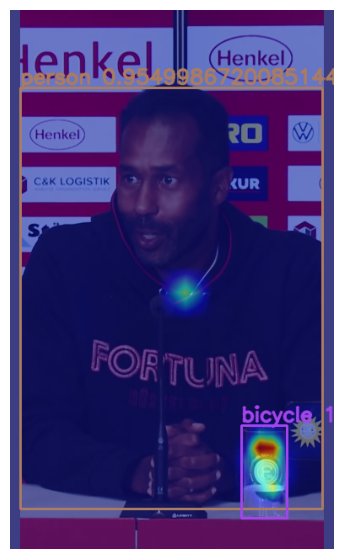

In [18]:

display_images(imagelist)